<a href="https://colab.research.google.com/github/janewen134/tensorflow_self_improvement/blob/after_class_revision/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Dataset

In [54]:
from sklearn import datasets
from pandas import DataFrame
import pandas as pd
import numpy as np
import tensorflow as tf


x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

shuffle data in dataset

In [55]:
np.random.seed(160)   # use same seed to keep shuffled x and y corresponding
np.random.shuffle(x_data)
np.random.seed(160)
np.random.shuffle(y_data)
tf.random.set_seed(160)

divide dataset into training set and test set

In [56]:
x_train = x_data[:-30,:]    # can use x_data[:-30] alternatively
x_test = x_data[-30:,:]
y_train = y_data[:-30]
y_test = y_data[-30:]

cast data type to float32 to avoid potential conflicts into the subsequent matrix computation

In [57]:
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

The from_tensor_slices function makes one-to-one correspondence between input features and label values. Divide the data set into batches.

In [58]:
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

To generate the parameters of the neural network, 4 input features, so the input layer has 4 input nodes; because of 3 classifications, the output layer has 3 neurons

In [59]:
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1))

hyperparameter

In [60]:
lr = 0.1    # learning rate
train_loss_results = []  # Record the loss of each round in this list to provide data for subsequent drawing of the loss curve
test_acc = []  # Record the acc of each round in this list to provide data for subsequent drawing of the acc curve
epoch = 500  # 500 cycles
loss_all = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和Each round is divided into 4 steps, loss_all records the sum of 4 losses generated by the four steps

training and testing part

In [ ]:
for epoch in range(epoch):
  for x_train, y_train in train_db:   # i.e.'for step, (x_train, y_train) in enumerate(train_db):'  
    with tf.GradientTape() as tape:
      y = tf.matmul(x_train, w1) + b1
      y = tf.nn.softmax(y)
      y_ = tf.one_hot(y_train, depth=3)
      loss = tf.reduce_mean(tf.square(y - y_))
      loss_all += loss.numpy()
    grads = tape.gradient(loss, [w1, b1])
    w1.assign_sub(lr * grads[0])
    b1.assign_sub(lr * grads[1])
  # print("Epoch {}, avg loss {}".format(epoch, loss_all/4))  
  train_loss_results.append(loss_all / 4)
  loss_all = 0
  testing part
  total_correct, total_number = 0, 0
  for x_test, y_test in test_db:
    y = tf.matmul(x_test, w1)+b1
    y = tf.nn.softmax(y)
    pred = tf.argmax(y, axis=1)
    pred = tf.cast(pred, dtype=y_test.dtype)
    correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
    correct = tf.reduce_sum(correct)
    total_correct += int(correct) # convert tf.int to int
    total_number += x_test.shape[0]
  acc = total_correct / total_number
  # The append() method in python adds a single item to the existing list. 
  # It doesn't return a new list of items but will modify the original list by 
  # adding the item to the end of the list.
  test_acc.append(acc)
  print("Test_acc:", acc)
  print("--------------------------")

Plot the loss curve

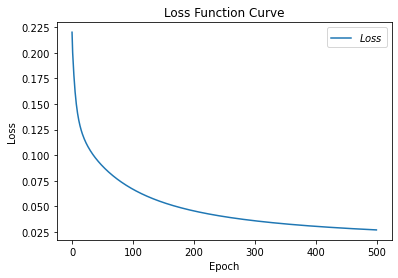

In [63]:
import matplotlib.pyplot as plt

plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像

Plot the accuracy curve

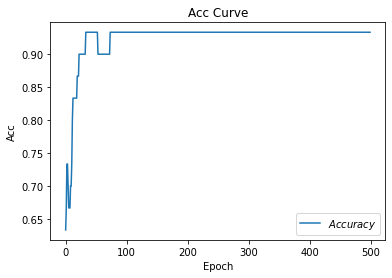

In [64]:
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()